In [1]:
# Import spectra
# see https://github.com/openplanetary/planetarygeology-book

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd 
from scipy.interpolate import interp1d

relabMontm = pd.read_csv('../data_samples/spectral_data/montmorillonite-1292F35-RELAB.txt', 
                      skipinitialspace=True, sep=' ',
                      skiprows=3, header=None)


relabMontm[:5] 

,0,1
0,0.3500,0.025839
1,0.3525,0.026137
2,0.3550,0.026436
3,0.3575,0.026805
4,0.3600,0.027175


In [2]:
relabMontm.rename(columns={0:'wavelength',1:'relabMontm'})[:5]

,wavelength,relabMontm
0,0.3500,0.025839
1,0.3525,0.026137
2,0.3550,0.026436
3,0.3575,0.026805
4,0.3600,0.027175


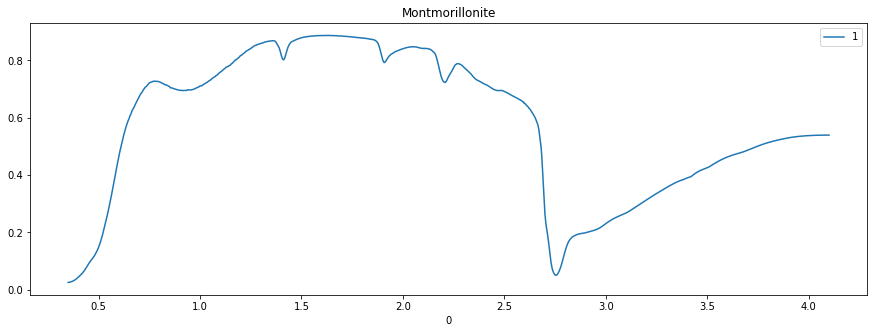

In [3]:
ax3=relabMontm.plot.line(0, figsize=(15,5), title="Montmorillonite")

## Continuum Removal 

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt


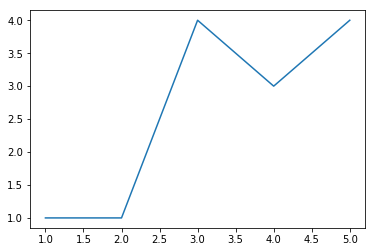

In [5]:
#try in small sized array
sample=np.asarray([[1,1],[2,1],[3,4],[4,3],[5,4]])
#get list of the first values and list of the second values (as x and y)
pivot=lambda sample: [[a[0] for a in sample],[a[1] for a in sample]]
pSample=pivot(sample)
plt.plot(pSample[0],pSample[1], '-')
plt.show()

In [6]:
#draw a line from the first to the last point
pSampleLineX=[pSample[0][0],pSample[0][-1]]
pSampleLineY=[pSample[1][0],pSample[1][-1]]
pSampleLine=[pSampleLineX,pSampleLineY]

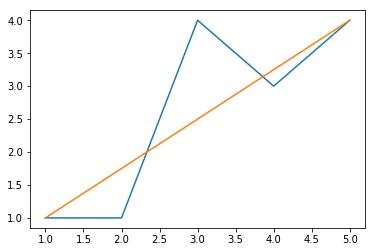

In [7]:
plt.plot(pSample[0],pSample[1], '-',pSampleLine[0],pSampleLine[1], '-')
plt.show()

In [8]:
#next we can interpoate our line to find out what values does it have at the points we've given
finterp = interp1d(pSampleLine[0],pSampleLine[1])#create interploation function

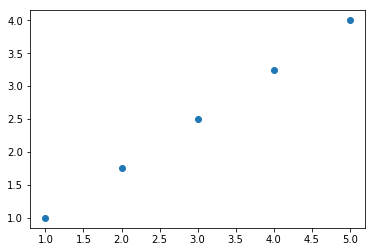

In [9]:
plt.plot(pSample[0],finterp(pSample[0]),'o') # check that interpolation worked
plt.show()

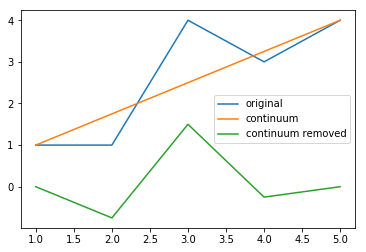

In [10]:
#now we can subtract interpolated values:
plt.plot(pSample[0],pSample[1], '-',pSampleLine[0],pSampleLine[1], '-',pSample[0],pSample[1]-finterp(pSample[0]),'-')
plt.legend(['original', 'continuum', 'continuum removed', 'cubic5000'], loc='best')
#plt.show()

In [11]:
#create a function for the steps above
def removeCont(pSample):
    pSampleLineX=[pSample[0][0],pSample[0][-1]]
    pSampleLineY=[pSample[1][0],pSample[1][-1]]
    pSampleLine=[pSampleLineX,pSampleLineY]
    finterp = interp1d(pSampleLine[0],pSampleLine[1])#create interploation function
    return pSample[1]-finterp(pSample[0])

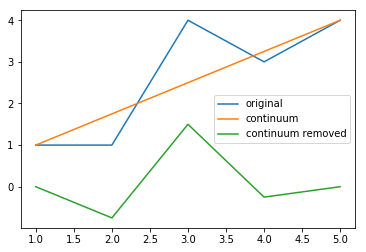

In [12]:
plt.plot(pSample[0],pSample[1], '-',pSampleLine[0],pSampleLine[1], '-',pSample[0],removeCont(pSample),'-')
plt.legend(['original', 'continuum', 'continuum removed', 'cubic5000'], loc='best')
plt.show()

In [13]:
#furthermore, we can ask numpy for an index of max:
maxIndex=np.argmax(removeCont(pSample)[1:-1]) +1
# From henceforth we could do this recursively - that is to use the output of a function as an input to itself:
def getMaxima(pSample):
    def getMaximaInner(innerSample):
        contRem=removeCont(innerSample)
        #print(contRem)
        maxIndex=np.argmax(contRem)
        #print(maxIndex)
        maxVal=contRem[maxIndex]
        maxLoc=innerSample[0][maxIndex]
        if len(contRem)>2 and maxVal>contRem[0] and maxVal>contRem[-1]: # check that the maximum is more than edges
            maxLocArray.append(maxLoc)
            #print(maxLoc)
            subsetLeft=[innerSample[0][:maxIndex+1],innerSample[1][:maxIndex+1]]
            #print(subsetLeft[0])
            subsetRight=[innerSample[0][maxIndex:],innerSample[1][maxIndex:]]
            #print(subsetRight[0])
            getMaximaInner(subsetLeft)
            getMaximaInner(subsetRight)
    maxLocArray=[] #initialize array to store a list of points on a convex hull
    getMaximaInner(pSample)
    maxLocArray.sort()
    return [pSample[0][0]]+maxLocArray+[pSample[0][-1]]

In [14]:
#maxList=getMaxima([pSample[0][:5],pSample[1][:5]])
maxList=getMaxima(pSample)
print(maxList)

[1, 3, 5]


[0.35, 0.645, 0.655, 0.665, 0.7, 0.7025, 0.705, 0.71, 0.72, 0.73, 0.75, 0.7525, 0.755, 0.7575, 0.76, 0.77, 1.28501, 1.31751, 1.33251, 1.33501, 1.35001, 1.35251, 1.5275100000000001, 1.54251, 1.5600100000000001, 1.57751, 1.60501, 1.63001, 1.6500099999999998, 1.69502, 1.72002, 1.7600200000000001, 1.79752, 1.82002, 1.8525200000000002, 2.1175200000000003, 2.1250299999999998, 4.10007]


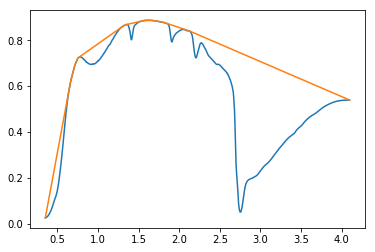

In [15]:
#Now trying with the real dataset
sample=np.asarray(relabMontm)
pSample=pivot(sample)
maxList=getMaxima(pSample)
print(maxList)
hull=[maxList,[x[1] for x in sample if x[0] in maxList]]
plt.plot(pSample[0],pSample[1], '-',hull[0],hull[1],'-')

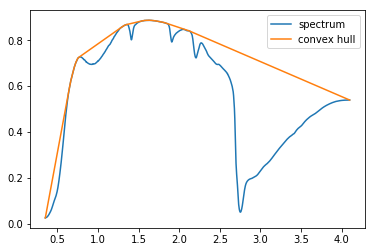

In [16]:
cleanSample=[value for value in sample if value[1]>0]
pSample=pivot(cleanSample)
maxList=getMaxima(pSample)
#print(maxList)
pHull=[maxList,[x[1] for x in sample if x[0] in maxList]]
plt.plot(pSample[0],pSample[1], '-',pHull[0],pHull[1],'-')
plt.legend(['spectrum', 'convex hull'])
plt.show()

In [17]:
def removeHull(pSample,pHull):
    finterp = interp1d(pHull[0],pHull[1])#create interploation function
    return pSample[1]-finterp(pSample[0])

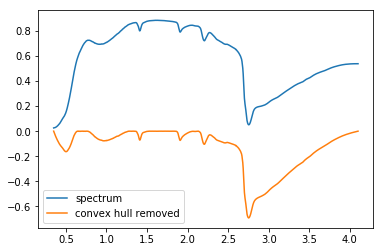

In [18]:
hullRemoved=removeHull(pSample,pHull)
plt.plot(pSample[0],pSample[1],'-',pSample[0],hullRemoved, '-')
plt.legend(['spectrum', 'convex hull removed'])
plt.show()

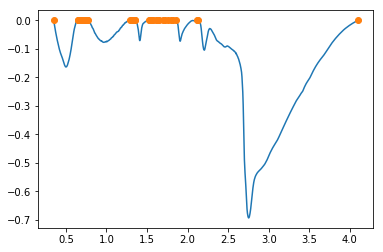

In [19]:
plt.plot(pSample[0],hullRemoved, '-',pHull[0], np.asarray(pHull[0])*0,'o')
plt.show()

In [20]:
splitInd=[pSample[0].index(x) for x in pHull[0]]
print(splitInd)

[0, 118, 122, 126, 140, 141, 142, 144, 148, 152, 160, 161, 162, 163, 164, 168, 374, 387, 393, 394, 400, 401, 471, 477, 484, 491, 502, 512, 520, 538, 548, 564, 579, 588, 601, 707, 710, 1500]


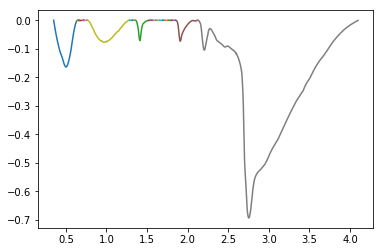

In [21]:
splitSample=[[pSample[0][splitInd[i]:splitInd[i+1]],hullRemoved[splitInd[i]:splitInd[i+1]]] 
             for i in range(len(splitInd)-1) if splitInd[i+1]-splitInd[i]>2]
for s in splitSample:
    plt.plot(s[0],s[1],'-')
plt.show()

In [22]:
listMinimaX=[x[0][np.argmin(x[1])] for x in np.asarray(splitSample)]
print(listMinimaX)

[0.5, 0.65, 0.66, 0.675, 0.715, 0.725, 0.735, 0.765, 0.9649989999999999, 1.31251, 1.3200100000000001, 1.34251, 1.41251, 1.53251, 1.55001, 1.56251, 1.60001, 1.61501, 1.63501, 1.6875200000000001, 1.7075200000000001, 1.74752, 1.7925200000000001, 1.8025200000000001, 1.8325200000000001, 1.90752, 2.12252, 2.75254]


In [23]:
listMinimaY=[pSample[1][pSample[0].index(x)] for x in listMinimaX]
print(listMinimaY)

[0.147886, 0.5962310000000001, 0.613917, 0.6364529999999999, 0.68966, 0.700813, 0.708335, 0.7251489999999999, 0.6981930000000001, 0.8612120000000001, 0.863458, 0.8668040000000001, 0.8020229999999999, 0.882941, 0.8839969999999999, 0.884804, 0.8861610000000001, 0.886151, 0.8864700000000001, 0.884685, 0.8839049999999999, 0.881386, 0.8780020000000001, 0.877296, 0.874332, 0.792406, 0.8403290000000001, 0.050927999999999994]


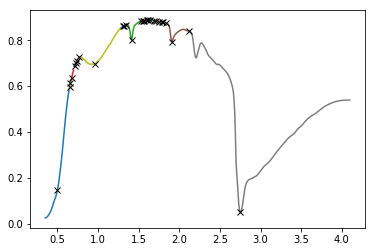

In [24]:
splitSample=[[pSample[0][splitInd[i]:splitInd[i+1]],pSample[1][splitInd[i]:splitInd[i+1]]] 
             for i in range(len(splitInd)-1) if splitInd[i+1]-splitInd[i]>2]
for s in splitSample:
    plt.plot(s[0],s[1],'-')
plt.plot(listMinimaX,listMinimaY,'x',color='black')
plt.show()

In [25]:
listMinimaYhullRemoved=[hullRemoved[pSample[0].index(x)] for x in listMinimaX]
print(listMinimaYhullRemoved)

[-0.164038593220339, -0.0012439999999999118, -0.0014969999999999706, -0.0018607142857144376, -0.001191499999999901, -0.00041949999999990606, -0.0016217499999999774, -0.0006010000000000737, -0.0775282730374166, -0.0008936923076922065, -0.00026533333333345066, -0.00030749999999990507, -0.07128997142857141, -0.00025966666666665805, -0.0005232857142857261, -0.0005748571428570992, -0.0004524545454545059, -0.0006745999999999697, -0.00045824999999988236, -0.0006101055321039439, -0.00036400000000003097, -0.0003699374999999172, -0.0007395333333332088, -0.0006458888888889458, -0.0005426153846154191, -0.07365320754716964, -0.0003079134487349311, -0.6937509342696857]


In [26]:
threshold=0.05
listMinimaSigX=[q[0] for q in list(zip(listMinimaX,listMinimaYhullRemoved)) if q[1]<-threshold]
listMinimaSigYhullRemoved=[q[1] for q in list(zip(listMinimaX,listMinimaYhullRemoved)) if q[1]<-threshold]
listMinimaSigY=[pSample[1][pSample[0].index(x)] for x in listMinimaSigX]

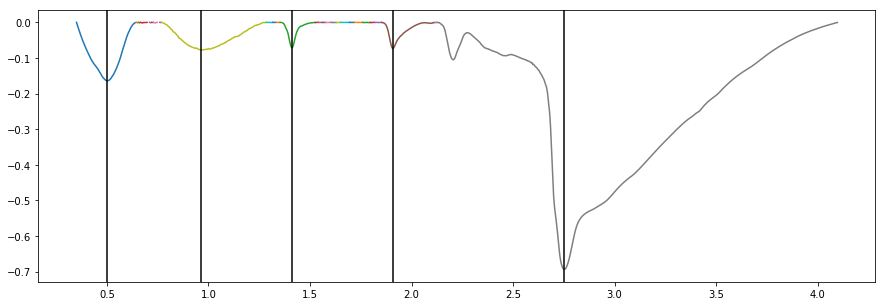

In [27]:
splitSample=[[pSample[0][splitInd[i]:splitInd[i+1]],hullRemoved[splitInd[i]:splitInd[i+1]]] 
             for i in range(len(splitInd)-1) if splitInd[i+1]-splitInd[i]>2]
plt.figure(figsize=(15,5)) #make larger figure
for s in splitSample:
    plt.plot(s[0],s[1],'-')
for xc in listMinimaSigX:
    plt.axvline(x=xc,color='black')
plt.show()

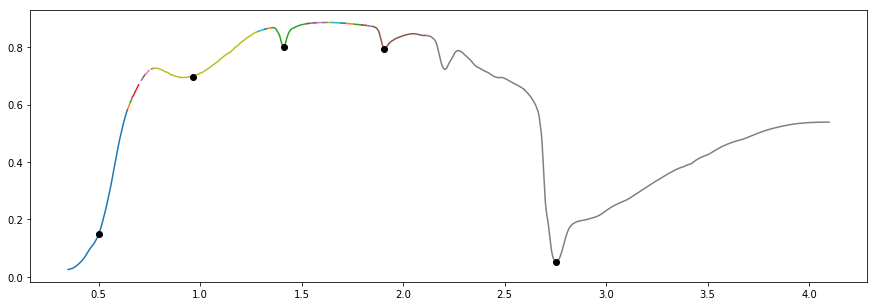

In [28]:
plt.figure(figsize=(15,5))
splitSample=[[pSample[0][splitInd[i]:splitInd[i+1]],pSample[1][splitInd[i]:splitInd[i+1]]] 
             for i in range(len(splitInd)-1) if splitInd[i+1]-splitInd[i]>2]
for s in splitSample:
    plt.plot(s[0],s[1],'-')
plt.plot(listMinimaSigX,listMinimaSigY,'o',color='black')
plt.show()

In [29]:
print("adsorption band center wavelenghts are:")
for item in listMinimaSigX:
    print(item, "micrometers")

adsorption band center wavelenghts are:
(0.5, 'micrometers')
(0.9649989999999999, 'micrometers')
(1.41251, 'micrometers')
(1.90752, 'micrometers')
(2.75254, 'micrometers')
